In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [3]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("C:/Users/Lenovo/Desktop/ChakkaMangaClassifier/dataset/Train/",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("C:/Users/Lenovo/Desktop/ChakkaMangaClassifier/dataset/Test/",
                                          target_size=(150,150),
                                          batch_size =32,                                        
                                          class_mode = 'binary') 


Found 1600 images belonging to 2 classes.
Found 456 images belonging to 2 classes.


In [4]:
model = keras.Sequential()

#Layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

#Layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

#Layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

#Layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

#Flattening layer
model.add(keras.layers.Flatten())

#Hidden layer
model.add(keras.layers.Dense(512,activation='relu'))

#Output Layer
model.add(keras.layers.Dense(1,activation='sigmoid'))


In [5]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
model.fit(train_dataset,
         epochs = 10,
         validation_data = test_dataset
         )

Epoch 1/10
50/50 [==============================] - 39s 771ms/step - loss: 0.5410 - accuracy: 0.7119 - val_loss: 0.4180 - val_accuracy: 0.7982
Epoch 2/10
50/50 [==============================] - 29s 589ms/step - loss: 0.4441 - accuracy: 0.7962 - val_loss: 0.4974 - val_accuracy: 0.7390
Epoch 3/10
50/50 [==============================] - 30s 592ms/step - loss: 0.4037 - accuracy: 0.8238 - val_loss: 0.2822 - val_accuracy: 0.8991
Epoch 4/10
50/50 [==============================] - 30s 592ms/step - loss: 0.2880 - accuracy: 0.8800 - val_loss: 0.2253 - val_accuracy: 0.9254
Epoch 5/10
50/50 [==============================] - 30s 591ms/step - loss: 0.2262 - accuracy: 0.9112 - val_loss: 0.2721 - val_accuracy: 0.8772
Epoch 6/10
50/50 [==============================] - 30s 596ms/step - loss: 0.2239 - accuracy: 0.9156 - val_loss: 0.2497 - val_accuracy: 0.8925
Epoch 7/10
50/50 [==============================] - 30s 592ms/step - loss: 0.1772 - accuracy: 0.9331 - val_loss: 0.2406 - val_accuracy: 0.8925

In [7]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("Mango",fontsize=30)
    elif val == 0:
        plt.xlabel("Jackfruit",fontsize=30)    

[[1.]]


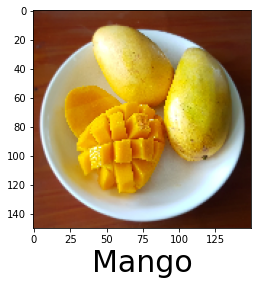

In [8]:
predictImage(r"C:\Users\Lenovo\Downloads\Carabao_mangoes_(Philippines).jpg")

In [9]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [10]:
model.save('C:/Users/Lenovo/Desktop/ChakkaMangaClassifier/model')



Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:/Users/Lenovo/Desktop/ChakkaMangaClassifier/model\assets
